## Problem 2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

We want to show how many events we need to see before a Gaussian and Poisson agree within a factor of 2 at both 3- and 5-sigma.  We'll do this by taking the 3/5-sigma levels of a Gaussian, and evaluating the difference in the log probability.

For convenience, lets generate log(n!) for a bunch of values of n.

In [ ]:
nmax=10000
ivec=np.arange(nmax)
ivec[0]=1 #special case since 0! is 1

log_ivec=np.log(ivec)
log_fact=np.cumsum(log_ivec)
#print a check value
icheck=10
print('comparison of ',icheck,' factorial is ',np.math.factorial(icheck),
      ' which we think is ',np.exp(log_fact[icheck]))



comparison of  10  factorial is  3628800  which we think is  3628800.0000000084


Now generate a list of expectations (lamda)

In [ ]:
# lamda=np.arange(3,nmax-10*np.sqrt(nmax))
lamda=np.arange(1,8000.99)

Print the log of Gaussian and Poisson as a function of n. n is $\lambda+5 \sqrt{\lambda}$

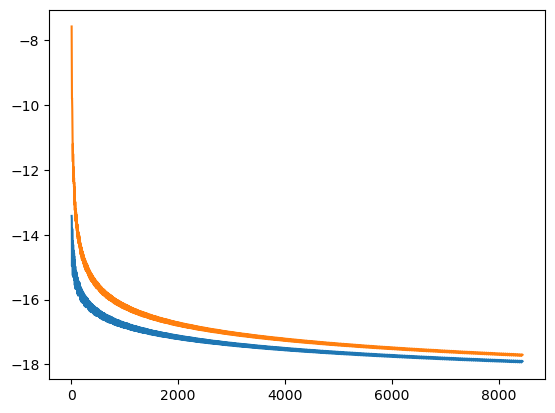

In [ ]:
nn=np.asarray(np.round(lamda+5*np.sqrt(lamda)),dtype='int64')
logg=-0.5*(nn-lamda)**2/lamda-0.5*np.log(2*np.pi*lamda)

logp=0*logg
for i in range(len(logg)):
    logp[i]=-lamda[i]+nn[i]*np.log(lamda[i])-log_fact[nn[i]]

plt.plot(nn,logg)
plt.plot(nn,logp)
plt.show()

Now let's find out how many n will make logg and logp close enough

In [ ]:
sigs=[5,3]
for nsig in sigs:
    nn=np.asarray(np.round(lamda+nsig*np.sqrt(lamda)),dtype='int64')
    logg=-0.5*(nn-lamda)**2/lamda-0.5*np.log(2*np.pi*lamda)
    logp=0*logg

    for i in range(len(logg)):
        logp[i]=-lamda[i]+nn[i]*np.log(lamda[i])-log_fact[nn[i]]
        
    if logp[0]>logg[0]:
        myind=np.min(np.where(logp-logg<np.log(2.0)))
    else:
        myind=np.min(np.where(logp-logg>np.log(0.5)))
    print('at ',nsig,' sigma, we need about ', nn[myind],' events to be good within a factor of 2.')


at  5  sigma, we need about  688  events to be good within a factor of 2.
at  3  sigma, we need about  13  events to be good within a factor of 2.
